In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [248]:
data = pd.read_csv('Pima_Indian_diabetes.csv')

## Data Visualization and Pre-processing

In [249]:
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


In [250]:
s = 0 
for i in range(768):
    if((data.loc[i].to_numpy() < 0).sum() > 0):
        s+=1
    
print("no.of rows with negative values " + str(s))

no.of rows with negative values 15


/home/srihari/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


Considering values less than 5th percentile and greater than 98th percentile as outliers

In [251]:
columns = data.columns
j=0
for i in columns:
    q = np.nanquantile(data[i], 0.98)
    mq = np.nanquantile(data[i], 0.05)
    data[i][data[i]<0] = np.nan
    data[i][data[i]<mq] = np.nan
    data[i][data[i]>q] = np.nan
    if(j>0 and j<8):
        data[i][data[i]==0] = np.nan
    j+=1

/home/srihari/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srihari/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/srihari/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srihari/.local/lib/python3.6/site-packages/ipykernel_launcher.p

In [252]:
s = 0 
for i in range(768):
    if(np.isnan(data.loc[i].to_numpy()).sum() > 0):
        s+=1
    
print("no.of rows with nan values " + str(s))


no.of rows with nan values 507


In [253]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,732.000000,699.000000,713.000000,513.000000,378.000000,703.000000,713.000000,736.000000,768.000000
mean,3.797431,121.560856,71.652577,28.169209,138.391534,32.398626,0.462447,33.116769,0.348958
std,3.284213,27.433856,11.022689,9.529269,83.491705,6.022847,0.267097,11.383712,0.476951
min,0.000000,76.000000,40.000000,7.000000,14.000000,21.000000,0.141000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,76.000000,27.700000,0.256000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,120.000000,32.400000,0.388000,29.000000,0.000000
75%,6.000000,139.304220,80.000000,35.000000,180.000000,36.450000,0.619000,41.000000,1.000000
max,13.000000,191.000000,98.000000,48.000000,465.000000,46.800000,1.390000,66.000000,1.000000


In [254]:
new_data = data
new_data = data.drop(columns = ["Outcome"])

for i in new_data.columns:
#     print(np.nanquantile(data[i], .25))
#     data[i].fillna(np.nanquantile(data[i], .25), inplace = True)
    if(i != 'Insulin' and i != 'SkinThickness'):
        new_data[i].fillna(np.mean(new_data[i]), inplace = True)

#new data is data without 'Outcome' 

In [255]:
print(new_data.head())
new_data.describe()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.600000   
1          1.0     85.0           66.0           29.0      NaN  26.600000   
2          8.0    183.0           64.0            NaN      NaN  23.300000   
3          1.0     89.0           66.0           23.0     94.0  32.398626   
4          0.0    137.0           40.0           35.0    168.0  43.100000   

   DiabetesPedigreeFunction   Age  
0                  0.627000  50.0  
1                  0.351000  31.0  
2                  0.672000  32.0  
3                  0.167000  21.0  
4                  0.462447  33.0  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,513.000000,378.000000,768.000000,768.000000,768.000000
mean,3.797431,121.560856,71.652577,28.169209,138.391534,32.398626,0.462447,33.116769
std,3.206213,26.170793,10.620131,9.529269,83.491705,5.761993,0.257342,11.143712
min,0.000000,76.000000,40.000000,7.000000,14.000000,21.000000,0.141000,21.000000
25%,1.000000,102.000000,64.000000,21.000000,76.000000,28.222422,0.259000,24.000000
50%,3.000000,121.280428,71.652577,28.000000,120.000000,32.398626,0.413500,30.000000
75%,6.000000,137.000000,78.000000,35.000000,180.000000,35.825000,0.595500,40.000000
max,13.000000,191.000000,98.000000,48.000000,465.000000,46.800000,1.390000,66.000000


In [256]:
s = 0
r = []
nr = []
for i in range(768):
    if(np.isnan(new_data.loc[i,'SkinThickness'])):
        s+=1
        nr.append(i)
    else:
        r.append(i)
    
df_sk = new_data.loc[r,['SkinThickness', 'BMI']]

In [257]:
print(df_sk.head(3))
df_sk.describe()

   SkinThickness        BMI
0           35.0  33.600000
1           29.0  26.600000
3           23.0  32.398626


,SkinThickness,BMI
count,513.000000,513.000000
mean,28.169209,32.704790
std,9.529269,5.671648
min,7.000000,21.000000
25%,21.000000,28.600000
50%,28.000000,32.398626
75%,35.000000,36.100000
max,48.000000,46.700000


In [258]:
df_sk['BMI'].values

array([33.6       , 26.6       , 32.39862557, 43.1       , 31.        ,
       30.5       , 30.1       , 25.8       , 45.8       , 43.3       ,
       34.6       , 39.3       , 29.        , 36.6       , 31.1       ,
       23.2       , 22.2       , 36.        , 31.6       , 24.8       ,
       24.        , 32.9       , 38.2       , 37.1       , 34.        ,
       22.7       , 45.4       , 42.        , 28.        , 39.1       ,
       32.39862557, 24.2       , 24.4       , 33.7       , 34.7       ,
       23.        , 37.7       , 41.5       , 25.4       , 29.        ,
       32.5       , 32.39862557, 28.9       , 32.9       , 32.39862557,
       32.        , 24.7       , 37.7       , 25.        , 22.4       ,
       29.3       , 32.39862557, 32.4       , 38.5       , 32.39862557,
       26.5       , 32.        , 46.7       , 24.7       , 33.9       ,
       31.6       , 32.39862557, 28.7       , 26.6       , 28.7       ,
       29.5       , 34.3       , 37.4       , 33.3       , 34.  

In [259]:
lir = LinearRegression()
lir.fit(df_sk[['BMI']].values, df_sk['SkinThickness'].values)
p = new_data.loc[nr,['BMI']].to_numpy()
predictions = lir.predict(p)

In [260]:
pd.Series(predictions)

0      18.796319
1      21.088518
2      30.755617
3      27.864083
4      33.047815
         ...    
250    31.752225
251    32.948154
252    30.954938
253    17.999033
254    25.573254
Length: 255, dtype: float64

In [261]:
j=0
for i in nr:
    new_data.loc[i,'SkinThickness'] = predictions[j]
    j+=1

In [262]:
new_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,378.000000,768.000000,768.000000,768.000000
mean,3.797431,121.560856,71.652577,27.864083,138.391534,32.398626,0.462447,33.116769
std,3.206213,26.170793,10.620131,8.500884,83.491705,5.761993,0.257342,11.143712
min,0.000000,76.000000,40.000000,7.000000,14.000000,21.000000,0.141000,21.000000
25%,1.000000,102.000000,64.000000,22.000000,76.000000,28.222422,0.259000,24.000000
50%,3.000000,121.280428,71.652577,27.864083,120.000000,32.398626,0.413500,30.000000
75%,6.000000,137.000000,78.000000,33.011954,180.000000,35.825000,0.595500,40.000000
max,13.000000,191.000000,98.000000,48.000000,465.000000,46.800000,1.390000,66.000000


In [263]:
s = 0
r = []
nr = []
for i in range(768):
    if(np.isnan(new_data.loc[i,'Insulin'])):
        s+=1
        nr.append(i)
    else:
        r.append(i)
    
df_in = new_data.loc[r,['Insulin', 'Glucose', 'BMI']]

In [264]:
print(df_in.head(3))
df_in.describe()

   Insulin  Glucose        BMI
3     94.0     89.0  32.398626
4    168.0    137.0  43.100000
6     88.0     78.0  31.000000


,Insulin,Glucose,BMI
count,378.000000,378.000000,378.000000
mean,138.391534,120.807747,32.856790
std,83.491705,26.241469,5.744705
min,14.000000,76.887945,21.100000
25%,76.000000,100.000000,28.700000
50%,120.000000,121.000000,32.450000
75%,180.000000,136.000000,36.475000
max,465.000000,191.000000,46.800000


In [265]:
lir = LinearRegression()
lir.fit(df_in[['BMI', 'Glucose']].values, df_in['Insulin'].values)
p = new_data.loc[nr,['BMI', "Glucose"]].to_numpy()
predictions = lir.predict(p)

In [266]:
predictions.mean()

138.43193453721403

In [267]:
j=0
for i in nr:
    new_data.loc[i,'Insulin'] = predictions[j]
    j+=1

In [268]:
new_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.797431,121.560856,71.652577,27.864083,138.412050,32.398626,0.462447,33.116769
std,3.206213,26.170793,10.620131,8.500884,66.436349,5.761993,0.257342,11.143712
min,0.000000,76.000000,40.000000,7.000000,14.000000,21.000000,0.141000,21.000000
25%,1.000000,102.000000,64.000000,22.000000,93.970242,28.222422,0.259000,24.000000
50%,3.000000,121.280428,71.652577,27.864083,127.760611,32.398626,0.413500,30.000000
75%,6.000000,137.000000,78.000000,33.011954,171.171204,35.825000,0.595500,40.000000
max,13.000000,191.000000,98.000000,48.000000,465.000000,46.800000,1.390000,66.000000


Age vs Outcome Histogram

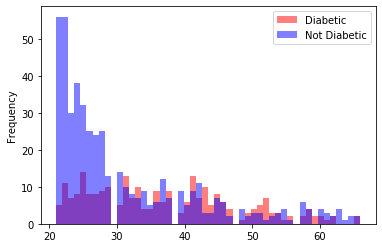

In [269]:
diabetic = data[data['Outcome'] == 1]
clear = data[data['Outcome'] == 0]
diabetic['Age'].plot.hist(alpha=0.5,color='red',bins=50)
clear['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Diabetic','Not Diabetic'])
plt.show()

In [270]:
cor = data.corr()
cor.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.0978205,0.20745,0.128529,0.107323,-0.0134364,-0.000969865,0.518913,0.192817
Glucose,0.0978205,1,0.206189,0.198823,0.526833,0.165877,0.0637877,0.2729,0.476782
BloodPressure,0.20745,0.206189,1,0.223472,0.0939482,0.262874,0.0263868,0.311572,0.157885
SkinThickness,0.128529,0.198823,0.223472,1,0.228215,0.620327,0.0507285,0.120309,0.25593
Insulin,0.107323,0.526833,0.0939482,0.228215,1,0.224835,0.108715,0.233123,0.299311
BMI,-0.0134364,0.165877,0.262874,0.620327,0.224835,1,0.137116,0.0457451,0.25673
DiabetesPedigreeFunction,-0.000969865,0.0637877,0.0263868,0.0507285,0.108715,0.137116,1,0.0630516,0.196484
Age,0.518913,0.2729,0.311572,0.120309,0.233123,0.0457451,0.0630516,1,0.244012
Outcome,0.192817,0.476782,0.157885,0.25593,0.299311,0.25673,0.196484,0.244012,1


## Normalisation

Normalising by replacing value by (x-min)/(max-min)

In [271]:
for i in columns[:-1]:
    new_data[i] = (new_data[i]-new_data[i].min())/(new_data[i].max()-new_data[i].min())

In [272]:
new_data.to_csv("processed.csv",sep = ",",index = False)

In [273]:
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.626087,0.551724,0.682927,0.370268,0.488372,0.389111,0.644444
1,0.076923,0.078261,0.448276,0.536585,0.123091,0.217054,0.168135,0.222222
2,0.615385,0.930435,0.413793,0.287715,0.431405,0.089147,0.425140,0.244444
3,0.076923,0.113043,0.448276,0.390244,0.177384,0.441807,0.020817,0.000000
4,0.000000,0.530435,0.000000,0.682927,0.341463,0.856589,0.257364,0.266667


## PCA

In [274]:
Covariance = new_data.cov() 
# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(Covariance)

# Project X onto PC space
X_pca = np.dot(eigen_vecs,new_data.T)



In [275]:
# print(eigen_vals*100/total)
# eigen_vecs

In [276]:
# new_eigvec = np.delete(eigen_vecs, 5, axis=0)
new_eigvec = eigen_vecs
newX_pca = np.dot(new_eigvec, new_data.T)

In [277]:
new_eigvec

array([[-0.45794885, -0.47835581, -0.35427559, -0.04066776,  0.59322429,
        -0.26906147, -0.0999153 , -0.00114075],
       [-0.38406113,  0.13096051,  0.76409842, -0.10279981,  0.2160318 ,
        -0.11057306,  0.05107644, -0.42358855],
       [-0.27576392,  0.03436758, -0.06428472, -0.08715227, -0.56598747,
        -0.76220521,  0.05397451,  0.08266341],
       [-0.31420437,  0.47308606, -0.29899572, -0.11309736,  0.13501915,
         0.12950031,  0.73378807,  0.04278204],
       [-0.22467054,  0.15258373,  0.32314021, -0.03202905,  0.1376817 ,
         0.0470652 , -0.15285149,  0.88105672],
       [-0.32056295,  0.57566791, -0.30384779, -0.05532763, -0.02178383,
         0.12385766, -0.64765642, -0.18758232],
       [-0.09827191,  0.12356608,  0.01813414,  0.97786253,  0.0580188 ,
        -0.11336752,  0.04642198, -0.01251863],
       [-0.55237211, -0.39886037,  0.00628734,  0.08420023, -0.48994515,
         0.53595183,  0.03274945, -0.0174102 ]])

In [278]:
#datanew is data_frame in which columns are projections of new_data along eigen vector directions
datanew = pd.DataFrame(newX_pca.T)
datanew.rename(columns={0: "P1", 1: "P2", 2: "P3", 3: "P4", 4: "P5", 5: "P6",6: "P7", 7: "P8"},inplace = True)
datanew.to_csv('EigenProjected.csv',sep=',',index=False)

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Model Fitting and Accuracy

In [280]:
lr = LogisticRegression()
scores = cross_val_score(lr, datanew, data['Outcome'], cv=10)

/home/srihari/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srihari/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srihari/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srihari/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srihari/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [281]:
print(scores)
np.mean(scores)

[0.71428571 0.74025974 0.75324675 0.76623377 0.74025974 0.77922078
 0.74025974 0.75324675 0.71052632 0.80263158]


0.7500170881749828